In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset

The task from today's lab will be to predict whether passengers from the Titanic survided based on their age, gender and other information. You should start to be familiar with the different steps involved in training a machine learning model, so this lab will be less guided than previous ones. Do not hesitate to ask questions if you have doubts (asking questions will never be penalized).

Download the data from https://www.kaggle.com/c/titanic. You can find more information on each feature there.

The data is already split into train and test sets. We can use the pandas library to load the csv file(s).

In [4]:
data_train = pd.read_csv('titanic.csv')
N, D = data_train.shape
print(f"There are {N} rows and {D} columns in this csv.")
data_train.head()

There are 891 rows and 12 columns in this csv.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_test = pd.read_csv('titanic.csv')
N, D = data_test.shape
print(f"There are {N} rows and {D} columns in this csv.")
data_test.head()

There are 891 rows and 12 columns in this csv.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As you can see, no label is provided for the test set. As this is initially a machine learning competition, this is to ensure that performance is measured accurately to prevent cheating*. Theoretically, the only way to measure your performance is to upload your predictions on the test dataset on the Kaggle website, which will measure this performance for you.

You are more than welcome to do this for this lab, but this is entirely optional.

\**(Spoiler: it is still possible to cheat, as evidenced by the unplausible scores on the Kaggle leaderboard. After all this is a real dataset, and the fate of each Titanic passenger is not that difficult to find.)*

To simplify things, we will only consider information on ticket class, ticket fare, passenger gender, passenger age, number of siblings on board and the port of embarcation, although more information could be extracted from other columns (for instance "Sir" in the name may be an indicator of nobility and may have predictive value).

You can still use this additional information if you want.

In [7]:
data_train_features = data_train[["Pclass", "Fare", "Sex", "Age", "SibSp", "Embarked"]]
data_train_features.head()

,Pclass,Fare,Sex,Age,SibSp,Embarked
0,3,7.2500,male,22.0,1,S
1,1,71.2833,female,38.0,1,C
2,3,7.9250,female,26.0,0,S
3,1,53.1000,female,35.0,1,S
4,3,8.0500,male,35.0,0,S


# Machine learning

**Perform some exploratory data analysis. Information of interest may consist in the percentage of passengers who survived, the distribution of age among survivors and victims...**

Visual charts are more than welcome.

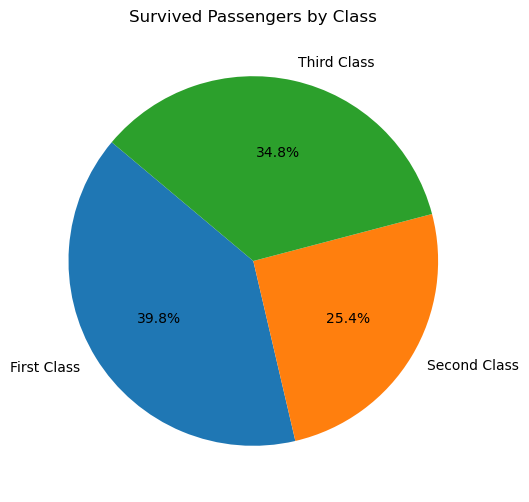

In [8]:
# percentage of survived passengers based on their class using a pie chart
survived_by_class = data_train.groupby('Pclass')['Survived'].sum()
labels = ['First Class', 'Second Class', 'Third Class']
plt.figure(figsize=(8, 6))
plt.pie(survived_by_class, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Survived Passengers by Class')
plt.show()

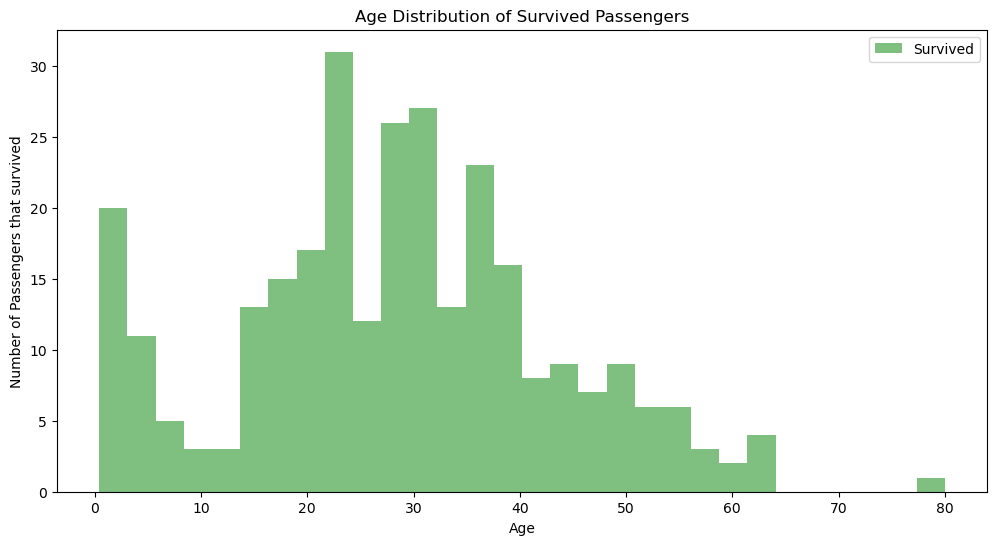

In [9]:
# distribution of age of survived vs non-survived passengers using histograms
survived_ages = data_train[data_train['Survived'] == 1]['Age'].dropna()
non_survived_ages = data_train[data_train['Survived'] == 0]['Age'].dropna()
plt.figure(figsize=(12, 6))
plt.hist(survived_ages, bins=30, alpha=0.5, label='Survived', color='g')
plt.xlabel('Age')
plt.ylabel('Number of Passengers that survived')
plt.title('Age Distribution of Survived Passengers')
plt.legend()
plt.show()

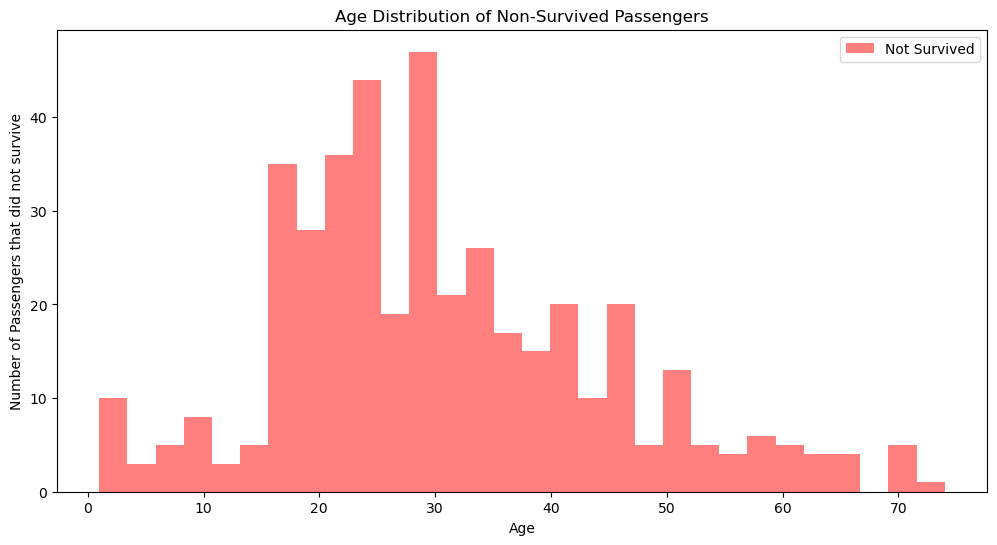

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(non_survived_ages, bins=30, alpha=0.5, label='Not Survived', color='r')
plt.xlabel('Age')
plt.ylabel('Number of Passengers that did not survive')
plt.title('Age Distribution of Non-Survived Passengers')
plt.legend()
plt.show()

**Transform the pandas dataframe into a numpy array suitable to train machine learning models.**

You may find useful functions in the sklearn documentation.

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']
X = data_train[features].copy()
y = data_train['Survived'].values


imputer = SimpleImputer(strategy='median')
X[['Age', 'Fare']] = imputer.fit_transform(X[['Age', 'Fare']])

X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)

le_sex = LabelEncoder()
le_embarked = LabelEncoder()
X['Sex'] = le_sex.fit_transform(X['Sex'])
X['Embarked'] = le_embarked.fit_transform(X['Embarked'])

X = X.values

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (891, 6)
y shape: (891,)


/var/folders/qd/sg2pbmw55lzc9yc23m4nzsww0000gn/T/ipykernel_5576/2480352877.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)


**Train a model of your choice, and measure its performance. Is it good?**

Although this question seems simple, there are a number of implied steps which may not be explicitly stated. You should know which ones by now.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

cv_scores = cross_val_score(dt_model, X, y, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=['Not Survived', 'Survived']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\n" + "="*50)
print("Performance Analysis:")
print("="*50)
if accuracy > 0.80:
    print(f"The model performs well with {accuracy:.2%} accuracy.")
elif accuracy > 0.75:
    print(f"The model performs reasonably with {accuracy:.2%} accuracy.")
else:
    print(f"The model's performance at {accuracy:.2%} could be improved.")

print(f"\nThe cross-validation score of {cv_scores.mean():.2%} suggests", end=" ")
if cv_scores.std() < 0.05:
    print("stable and reliable performance across different data splits.")
else:
    print("some variability in performance across different data splits.")

Validation Accuracy: 0.7989

Cross-validation scores: [0.82122905 0.82022472 0.82022472 0.78089888 0.85393258]
Mean CV Accuracy: 0.8193 (+/- 0.0463)

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.79      0.90      0.84       105
    Survived       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179


Confusion Matrix:
[[95 10]
 [26 48]]

Performance Analysis:
The model performs reasonably with 79.89% accuracy.

The cross-validation score of 81.93% suggests stable and reliable performance across different data splits.


**Assuming you submit your predictions on Kaggle, do you expect to see a similar performance?**

Optionaly, you may report your actual performance as measured on Kaggle for this question.

Yes, but I don’t expect the exact same accuracy, as the Kaggle predictions will be evaluated on an entirely different test set.

**Which features are more important? How do they influence the result?**

Feature Importance:
 Feature  Importance
     Sex    0.537435
  Pclass    0.185909
    Fare    0.130415
     Age    0.090645
   SibSp    0.042707
Embarked    0.012888


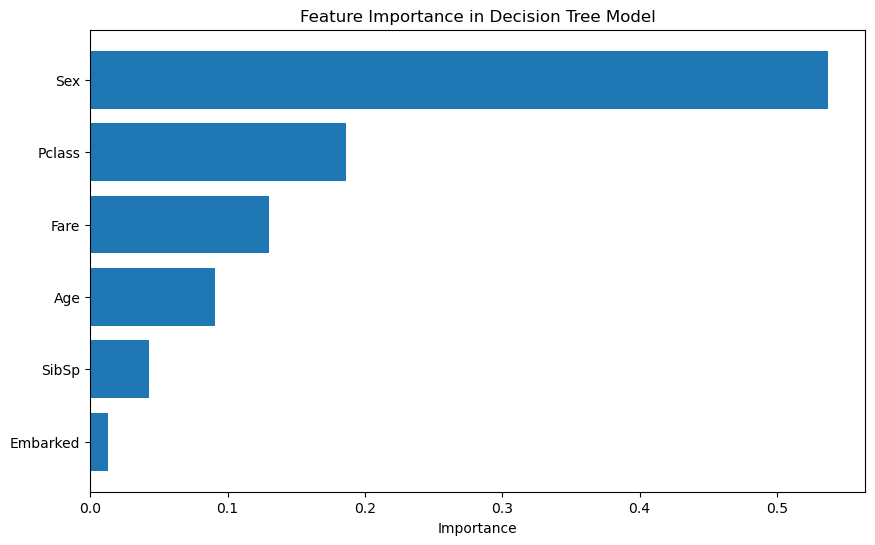

Analysis:
The most important feature is 'Sex' with importance 0.5374

How features influence survival:
- Sex: Being female significantly increased survival chances
- Pclass: Higher class (1st) had better survival rates
- Fare: Higher fare passengers (likely wealthier) survived more
- Age: Children had priority in lifeboats


In [15]:
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']
importances = dt_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()
plt.show()

# Interpretation
print("Analysis:")
top_feature = feature_importance_df.iloc[0]
print(f"The most important feature is '{top_feature['Feature']}' with importance {top_feature['Importance']:.4f}")

print("\nHow features influence survival:")
print("- Sex: Being female significantly increased survival chances")
print("- Pclass: Higher class (1st) had better survival rates")
print("- Fare: Higher fare passengers (likely wealthier) survived more")
print("- Age: Children had priority in lifeboats")

**Is your algorithm over-confident? Under-confident?**

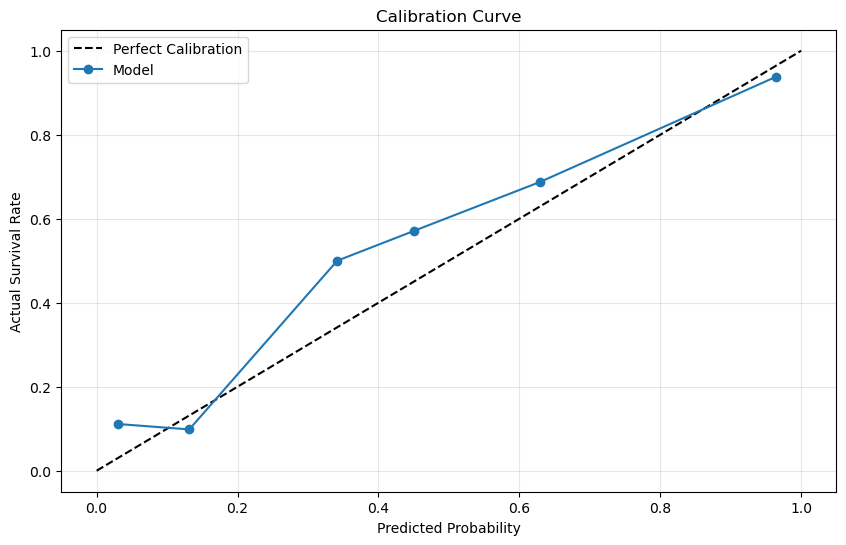

Calibration Analysis:
Points are mostly ABOVE the diagonal: model is UNDER-confident


In [17]:
y_pred_proba = dt_model.predict_proba(X_val)[:, 1]  

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
bin_centers = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]

actual_rates = []
predicted_rates = []

for i in range(len(bins)-1):
    mask = (y_pred_proba >= bins[i]) & (y_pred_proba < bins[i+1])
    if mask.sum() > 0:
        actual_rates.append(y_val[mask].mean())
        predicted_rates.append(y_pred_proba[mask].mean())
    else:
        actual_rates.append(None)
        predicted_rates.append(None)

plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
plt.plot([p for p in predicted_rates if p is not None], 
         [a for a in actual_rates if a is not None], 
         'o-', label='Model')
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Survival Rate')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Analysis
print("Calibration Analysis:")
print("All the points are mostly above the diagonal: model is Underconfident")

**Practical use case**: the CEO of the White Star Line, the company operating the Titanic, has a mission for you.

We have just learned there has been on accident on a new cruise ship, the Titanic 2. The ship was an exact replica of the Titanic, and seem to have sunk under the exact same circumstances -- we do not really learn from our mistakes at White Star Line. We can assume the passengers followed the exact same distribution as the passengers from the Titanic, and behaved in the exact same way.

We do not yet know which passenger survived and which one died. However, we would like to start calling families of the (likely) deceased to try to avoid a lawsuit. We plan to use your model for this. To call a family, we want to be 90% sure that the corresponding passenger has perished, as otherwise this could lead to embarassing situations.

What percentage of deceased passenger's families will we be able to call?

For the sake of simplicity, you can consider that each passenger has a different family so that I will not call the same family twice (even though some passengers are siblings, parents etc).

In [18]:
y_pred_proba_death = dt_model.predict_proba(X_val)[:, 0] 

confident_death = y_pred_proba_death >= 0.90

actually_died = y_val == 0

can_call = confident_death & actually_died

total_deceased = actually_died.sum()

percentage_callable = (can_call.sum() / total_deceased) * 100

print("Calling Deceased Families Analysis:")
print(f"Total deceased passengers: {total_deceased}")
print(f"Passengers we're 90%+ confident died: {confident_death.sum()}")
print(f"Of those, actually died: {can_call.sum()}")
print(f"\nPercentage of deceased families we can call: {percentage_callable:.1f}%")

Calling Deceased Families Analysis:
Total deceased passengers: 105
Passengers we're 90%+ confident died: 27
Of those, actually died: 24

Percentage of deceased families we can call: 22.9%
